# Исследование надежности заемщиков.

## Обзор данных

Открыл таблицу, посмотрел внешний вид и изучил общую информацию о данных.

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
try:
    df = pd.read_csv('C:\\Users\\Имя\\Desktop\\data.csv')
except FileNotFoundError:    
    df = pd.read_csv('/datasets/faces/labels.csv')

In [24]:
display(df)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
...,...,...,...,...,...,...,...,...,...,...,...,...
21520,1,-4529.316663,43,среднее,1,гражданский брак,1,F,компаньон,0,224791.862382,операции с жильем
21521,0,343937.404131,67,среднее,1,женат / замужем,0,F,пенсионер,0,155999.806512,сделка с автомобилем
21522,1,-2113.346888,38,среднее,1,гражданский брак,1,M,сотрудник,1,89672.561153,недвижимость
21523,3,-3112.481705,38,среднее,1,женат / замужем,0,M,сотрудник,1,244093.050500,на покупку своего автомобиля


In [25]:
df.shape

(21525, 12)

<div class="alert alert-block alert-success">
<b>Успех:</b> Некоторую информацию по нашим данным уже видно, это здорово. Когда дополнишь исследование, мы сможем посмотреть на все аспекты данных и возможно составить план предобработки.
</div>

## Предобработка данных

### Заполнение пропусков

В двух столбцах (days_employed, total_income) есть пропущенные значения (NaN), заменю их медианным значением по столбцу.

In [26]:
share_omissions_days_employed = 1 - (df['days_employed'].count() / df['children'].count())
share_omissions_total_income = 1 - df['total_income'].count() / df['children'].count()
print(f'Доля пропущенных значений в столбце "days_employed" составляет: {share_omissions_days_employed:.1%}')
print(f'Доля пропущенных значений в столбце "total_income" составляет: {share_omissions_total_income:.1%}')

days_employed_median = df['days_employed'].median()
df['days_employed'] = df['days_employed'].fillna(days_employed_median)

total_income_median = df['total_income'].median()
df['total_income'] = df['total_income'].fillna(total_income_median)

df.info()


Доля пропущенных значений в столбце "days_employed" составляет: 10.1%
Доля пропущенных значений в столбце "total_income" составляет: 10.1%
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     21525 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      21525 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


<div class="alert alert-block alert-success">
<b>Успех:</b> Да, такой способ предобработки данных допустим и имеет логическое объяснение. Попробуй предположить, как могли появится пропуски в столбцах 'days_employed' и 'total_income', возможно это поможет тебе определить, как их заполнять.
</div>

В столбцах (days_employed, total_income) пропущенные значения составляют около 10 % в каждом.

В связи с тем что количество пропусков в двух столбцах одинаковое, а в других столбцах пропусков нет, можно предположить, что причиной появления этих пропусков является ошибки при выгрузке, копирования или другими манипуляциями с данными.

В столбцах (days_employed, total_income) заполнить пропуски необходимо медианным значением, т. к. для количественных переменных, встречаются слишком большие или слишком маленькие значения, которые могут сильно исказить реальную "картину" значений. 

### Проверка данных на аномалии и исправления.

#### Проверим столбец 'children' на содержание артефактов (аномалии)

In [27]:
print(df['children'].value_counts())


 0     14149
 1      4818
 2      2055
 3       330
 20       76
-1        47
 4        41
 5         9
Name: children, dtype: int64


В столбце "children" (количество детей в семье) встречаются значения 20, при этом предыдущее по количеству детей 5, поэтому 20 является ошибкой на этапе ввода данных (случайно нажатый нуль на клавиатуре и находится рядом с двойкой). 
Исправим это значение на 2. А значение -1 исправим на 1 по похожей причине (видимо имелось в виду тире).

In [28]:
df.loc[(df.children == 20), 'children'] = 2
df.loc[(df.children == -1), 'children'] = 1
print(df['children'].value_counts())

0    14149
1     4865
2     2131
3      330
4       41
5        9
Name: children, dtype: int64


Посмотрим на столбец 'days_employed' проверим на содержание артефактов (аномалии)

-18388.949900568383
401755.40047533
-50.38068465909146
1100.6997273296713
-1203.369529      2175
-8437.673028         1
-5135.928528         1
 354500.415854       1
-769.717438          1
                  ... 
-209.984794          1
 398099.392433       1
-1271.038880         1
-1623.362064         1
-1984.507589         1
Name: days_employed, Length: 19351, dtype: int64


,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
6954,0,401755.400475,56,среднее,1,вдовец / вдова,2,F,пенсионер,0,176278.441171,ремонт жилью
10006,0,401715.811749,69,высшее,0,Не женат / не замужем,4,F,пенсионер,0,57390.256908,получение образования
7664,1,401675.093434,61,среднее,1,женат / замужем,0,F,пенсионер,0,126214.519212,операции с жильем
2156,0,401674.466633,60,среднее,1,женат / замужем,0,M,пенсионер,0,325395.724541,автомобили
7794,0,401663.850046,61,среднее,1,гражданский брак,1,F,пенсионер,0,48286.441362,свадьба
...,...,...,...,...,...,...,...,...,...,...,...,...
20444,0,328728.720605,72,среднее,1,вдовец / вдова,2,F,пенсионер,0,96519.339647,покупка жилья для семьи
17437,1,-24.141633,31,среднее,1,женат / замужем,0,F,сотрудник,1,166952.415427,высшее образование
8336,0,-24.240695,32,высшее,0,Не женат / не замужем,4,M,сотрудник,0,124115.373655,получение дополнительного образования
6157,2,-30.195337,47,среднее,1,гражданский брак,1,M,компаньон,0,231461.185606,свадьба


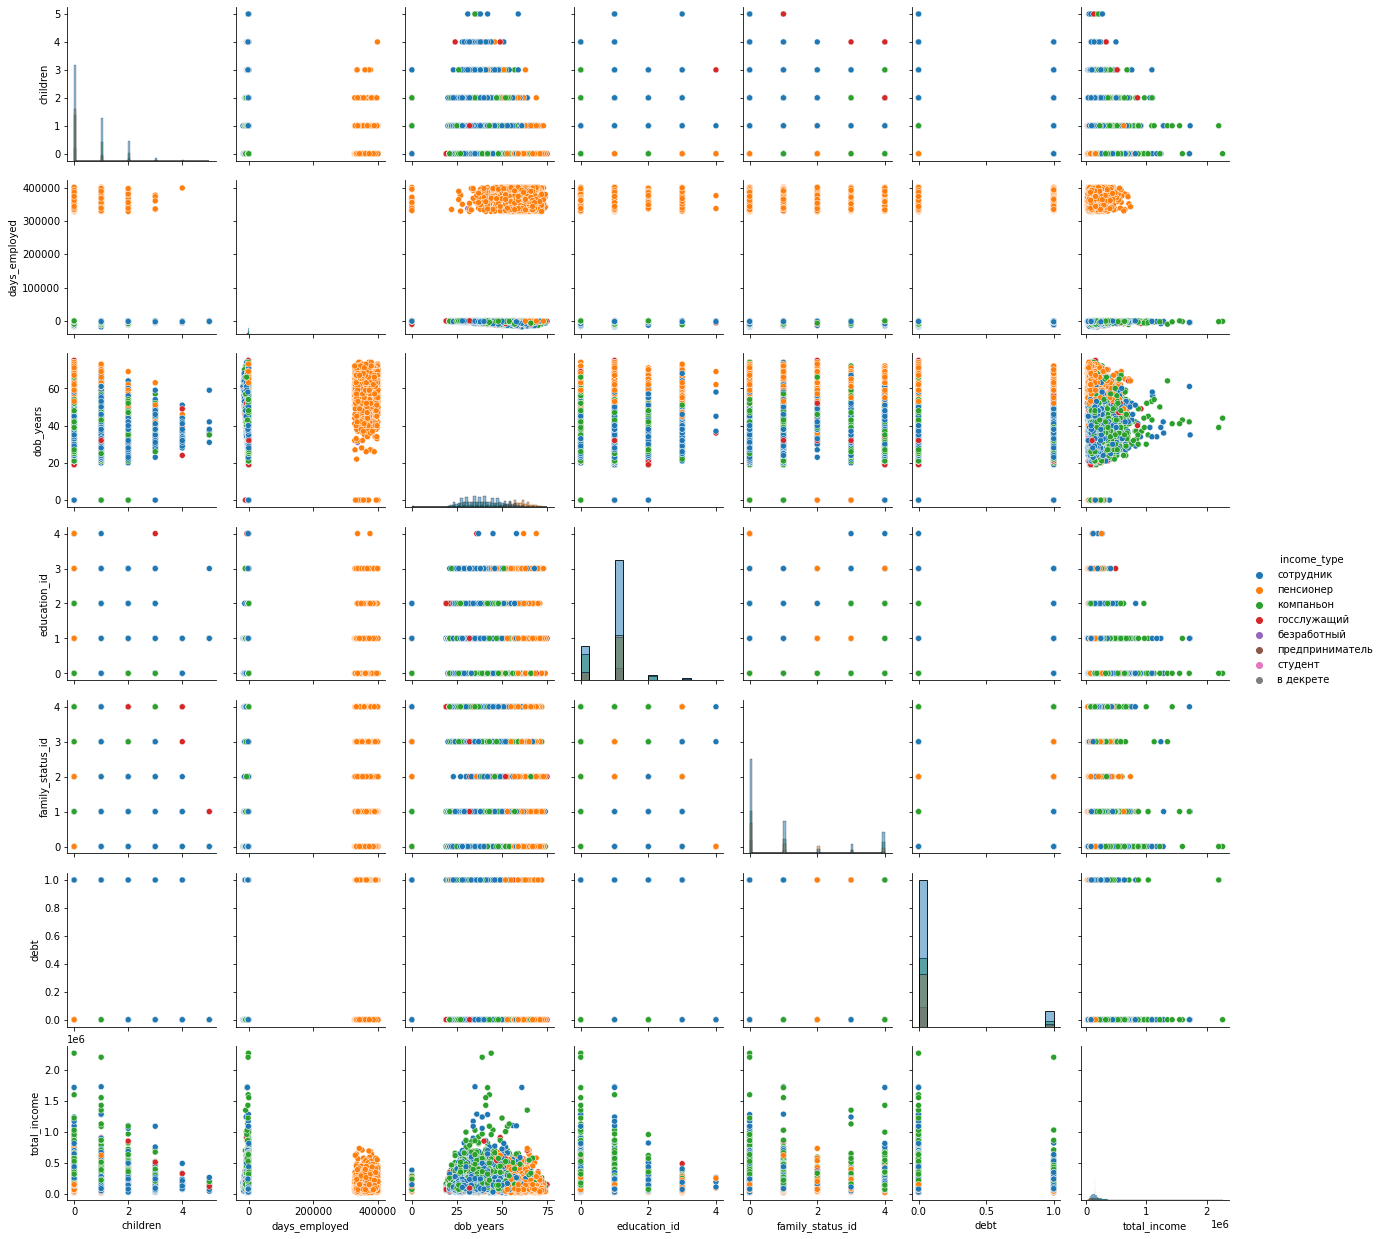

In [29]:
print(df['days_employed'].min())
print(df['days_employed'].max())
print(df['days_employed'].min() / 365)
print(df['days_employed'].max() / 365)
print(df['days_employed'].value_counts())
df_sort = df.sort_values(by='days_employed', ascending=False)
display(df_sort.head(3449))

sns.pairplot(df, hue = "income_type", diag_kind = 'hist', kind = 'scatter')
#sns.scatterplot(data=df, x="dob_years", y="days_employed")

В столбце "days_employed" (общий трудовой стаж в днях) присутствуют отрицательные значения, а также 3445 строк с положительными значениями находящимися в интервале от 328728 до 401755 дней, что соответствует от 900 до 1100 лет трудового стажа, чего не может быть. Хотя показатель того что положительные значения начинаются не с каких-то единиц , а сразу с 328728 и до 401755 говорит о том что эти данные были одинаково «увеличены» на какое-то  общее значение. Что касается отрицательных значений которые начинаются с -24 до -18388, и если не брать во внимание знак минус, то это от 2 до 50 лет и причем это не пенсионеры. Это укладывается в реальные значения, только необходимо избавиться от минуса, который возможно был получен в результате какой-то манипуляции с данными. А что касается "больших" положительных значений которые принадлежат только пенсионерам, то их можно привести в примерное соответствие реальным значениям разделим их на коэффициент.

Во-первых: Этот коэффициент можно получить из среднего значения выхода на пенсию среднестатистического гражданина это 61,5 лет или точнее 22447,5 дней (данные получены из Википедии) и среднее значение среди положительных в нашем столбце, и он составит 16.26. Теперь разделив все положительные значения на коэффициент ‘k’ , а все отрицательные на (-1)  получим корректные значения трудового стажа в днях. Производить замену "больших" значений на наступление пенсионного возраста для мужчин и женщин нельзя, т. к. по статистике Роструда только четверть пенсионеров уходит на заслуженный отдых по достижении пенсионного возраста, а есть еще особые категории граждан которые уходят на пенсию гораздо раньше. Мало того при этом динамика данных в датафрейме будет утеряна.

Во-вторых: Если не брать внешние данные и оперировать только данными из датафрейма можно увидеть что все положительные значения принадлежат только пенсионерам, кроме двух строк, что составляет 0,058%. Еще пенсионерам принадлежат 423 строки с отрицательными значениями стажа -1203.369529, при этом другие значения в этих строках разные, значит это также является аномалией. Заменим эти значения среднем возрастом выхода на пенсию.



,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,20926.116336,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


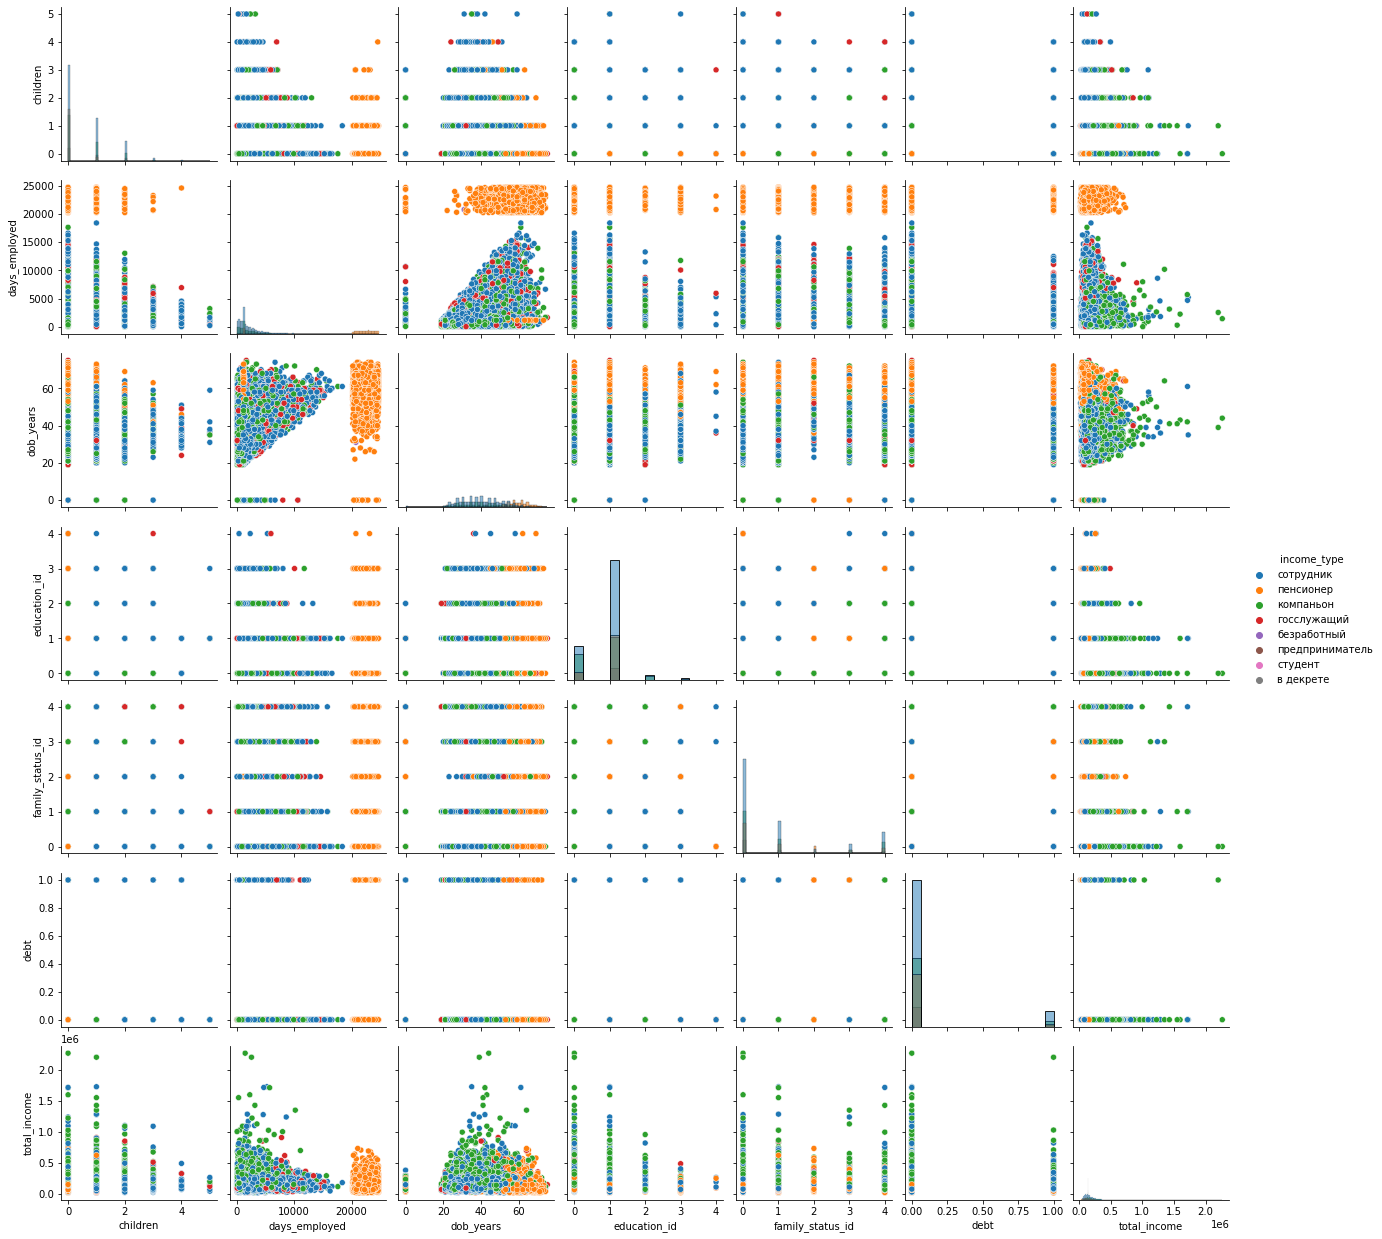

In [30]:
count_positive = df[df['days_employed'] > 0]['days_employed'].count()
sum_positive = df[df['days_employed'] > 0]['days_employed'].sum()
k = (sum_positive / count_positive) / 22447.5
display(df.head(10))

i = -1
for value in df['days_employed']:
    i += 1
    if value < 0:
        df.loc[i, 'days_employed'] = df.loc[i, 'days_employed'] * -1
        if value == 1203.369528770489:
            df.loc[i, 'days_employed'] =  22447.5
    else:
        df.loc[i, 'days_employed'] = df.loc[i, 'days_employed'] / k
                
        
sns.pairplot(df, hue = "income_type", diag_kind = 'hist', kind = 'scatter')
display(df.head(10))
    




**Вывод:**

Теперь весь столбец соответствует примерно реальным значениям. Хотя бросается в глаза отсутствие заявок на кредит для лиц со стажем близким к пенсионному, но искусственно как-то "вытягивать" или заполнять эти "пробелы" нельзя, можно сильно исказить данные и возможно это связано с нежеланием брать кредит именно той группы населения, которые выросли в перестройку и не готовы вообще связываться с кредитами. Оставим в таком виде. А нулевыми значениями возраста займемся в следующем пункте.

#### Проверим столбец 'dob_years' (возраст клиента в годах) на содержание артефактов (аномалии). Значение "0" заменим на среднее, хотя в данном случае, среднее от медианного не значительно отличаются.

In [31]:
print(df['dob_years'].value_counts())
dob_years_mean = df['dob_years'].mean() 
df.loc[(df.dob_years == 0), 'dob_years'] = int(dob_years_mean)
print(df['dob_years'].value_counts())



35    617
40    609
41    607
34    603
38    598
42    597
33    581
39    573
31    560
36    555
44    547
29    545
30    540
48    538
37    537
50    514
43    513
32    510
49    508
28    503
45    497
27    493
56    487
52    484
47    480
54    479
46    475
58    461
57    460
53    459
51    448
59    444
55    443
26    408
60    377
25    357
61    355
62    352
63    269
64    265
24    264
23    254
65    194
22    183
66    183
67    167
21    111
0     101
68     99
69     85
70     65
71     58
20     51
72     33
19     14
73      8
74      6
75      1
Name: dob_years, dtype: int64
35    617
43    614
40    609
41    607
34    603
38    598
42    597
33    581
39    573
31    560
36    555
44    547
29    545
30    540
48    538
37    537
50    514
32    510
49    508
28    503
45    497
27    493
56    487
52    484
47    480
54    479
46    475
58    461
57    460
53    459
51    448
59    444
55    443
26    408
60    377
25    357
61    355
62    352
63    269


#### Проверим столбец 'family_status' на содержание артефактов (аномалии). Здесь можно заменить заглавную на строчную букву. 

In [32]:
print(df['family_status'].value_counts())

женат / замужем          12380
гражданский брак          4177
Не женат / не замужем     2813
в разводе                 1195
вдовец / вдова             960
Name: family_status, dtype: int64


Здесь только можно заменить заглавную на строчную букву в дальнейшем.

#### Проверим столбец 'gender' на содержание артефактов (аномалии).

In [33]:
print(df['gender'].value_counts())

F      14236
M       7288
XNA        1
Name: gender, dtype: int64


Значение "XNA" встречается 1 раз. Посмотрим на строку

In [34]:
df[df['gender'] == 'XNA']

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
10701,0,2358.600502,24,неоконченное высшее,2,гражданский брак,1,XNA,компаньон,0,203905.157261,покупка недвижимости


24 года, неоконченное высшее, детей нет, покупка недвижимости - больше похоже на "М", хотя можно и удалить строку, на датафрейме это не отразится. Заменим на "М" 

In [35]:
df.loc[(df.gender == 'XNA'), 'gender'] = 'M'
print(df['gender'].value_counts())

F    14236
M     7289
Name: gender, dtype: int64


#### Проверим остальные стобцы: 'education_id', 'income_type', 'debt', 'total_income', 'purpose'на содержание артефактов (аномалии).

In [36]:
print(df['education_id'].value_counts())
print()
print(df['education'].value_counts())
print()
print(df['income_type'].value_counts())
print()
print(df['debt'].value_counts())
print()
print(df['total_income'].value_counts())
print()
print(df['purpose'].value_counts())

1    15233
0     5260
2      744
3      282
4        6
Name: education_id, dtype: int64

среднее                13750
высшее                  4718
СРЕДНЕЕ                  772
Среднее                  711
неоконченное высшее      668
ВЫСШЕЕ                   274
Высшее                   268
начальное                250
Неоконченное высшее       47
НЕОКОНЧЕННОЕ ВЫСШЕЕ       29
НАЧАЛЬНОЕ                 17
Начальное                 15
ученая степень             4
Ученая степень             1
УЧЕНАЯ СТЕПЕНЬ             1
Name: education, dtype: int64

сотрудник          11119
компаньон           5085
пенсионер           3856
госслужащий         1459
безработный            2
предприниматель        2
студент                1
в декрете              1
Name: income_type, dtype: int64

0    19784
1     1741
Name: debt, dtype: int64

145017.937533    2175
253875.639453       1
131286.073745       1
116196.518662       1
157205.834562       1
                 ... 
148042.721049       1
60039.3344

В этих столбцах аномалий нет, хотя видны явные или не явные дубликаты. Ими займемся позже.

### Изменение типов данных.

#### Заменим вещественный тип данных в более подходящий в столбцах 'total_income' и 'days_employed' на целочисленный, с помощью метода astype()

In [37]:
df['days_employed'] = df['days_employed'].astype('int')
df['total_income'] = df['total_income'].astype('int')
display(df.head(3))
df.info()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,8437,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья
1,1,4024,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля
2,0,5623,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   children          21525 non-null  int64 
 1   days_employed     21525 non-null  int32 
 2   dob_years         21525 non-null  int64 
 3   education         21525 non-null  object
 4   education_id      21525 non-null  int64 
 5   family_status     21525 non-null  object
 6   family_status_id  21525 non-null  int64 
 7   gender            21525 non-null  object
 8   income_type       21525 non-null  object
 9   debt              21525 non-null  int64 
 10  total_income      21525 non-null  int32 
 11  purpose           21525 non-null  object
dtypes: int32(2), int64(5), object(5)
memory usage: 1.8+ MB


### Удаление дубликатов.

**Проверим строковые столбецы на содержание уникальных значений** 

#### Столбец 'education'

In [38]:
df['education'].unique()

array(['высшее', 'среднее', 'Среднее', 'СРЕДНЕЕ', 'ВЫСШЕЕ',
       'неоконченное высшее', 'начальное', 'Высшее',
       'НЕОКОНЧЕННОЕ ВЫСШЕЕ', 'Неоконченное высшее', 'НАЧАЛЬНОЕ',
       'Начальное', 'Ученая степень', 'УЧЕНАЯ СТЕПЕНЬ', 'ученая степень'],
      dtype=object)

В столбце 'education' есть одни и те же значения, но записанные по-разному: с использованием заглавных и строчных букв. Приведитем их к одному регистру.

In [39]:
df["education"] = df["education"].str.lower()
df['education'].unique()

array(['высшее', 'среднее', 'неоконченное высшее', 'начальное',
       'ученая степень'], dtype=object)

Исправлено

#### Столбец 'family_status'

In [40]:
df['family_status'].unique()

array(['женат / замужем', 'гражданский брак', 'вдовец / вдова',
       'в разводе', 'Не женат / не замужем'], dtype=object)

In [41]:
df['family_status'] = df['family_status'].str.lower()

Исправлено

#### Столбец 'gender'

In [42]:
df['gender'].unique()

array(['F', 'M'], dtype=object)

Здесь все нормально

#### Столбец 'income_type'

In [43]:
df['income_type'].unique()

array(['сотрудник', 'пенсионер', 'компаньон', 'госслужащий',
       'безработный', 'предприниматель', 'студент', 'в декрете'],
      dtype=object)

Исправим

In [44]:
df.loc[(df.income_type == 'в декрете'), 'income_type'] = 'в_декрете'
df['income_type'].unique()

array(['сотрудник', 'пенсионер', 'компаньон', 'госслужащий',
       'безработный', 'предприниматель', 'студент', 'в_декрете'],
      dtype=object)

Исправлено

#### Столбец 'purpose'

In [45]:
print(df['purpose'].value_counts())

свадьба                                   797
на проведение свадьбы                     777
сыграть свадьбу                           774
операции с недвижимостью                  676
покупка коммерческой недвижимости         664
покупка жилья для сдачи                   653
операции с жильем                         653
операции с коммерческой недвижимостью     651
покупка жилья                             647
жилье                                     647
покупка жилья для семьи                   641
строительство собственной недвижимости    635
недвижимость                              634
операции со своей недвижимостью           630
строительство жилой недвижимости          626
покупка недвижимости                      624
строительство недвижимости                620
покупка своего жилья                      620
ремонт жилью                              612
покупка жилой недвижимости                607
на покупку своего автомобиля              505
заняться высшим образованием      

Здесь всё нормально, но требуется объединение по критериям. Этим займемся позже.

#### Теперь найдем количество дубликатов

In [46]:
df.duplicated().sum()

71

Избавимся от них и восстановим индексы.

In [47]:
df  = df.drop_duplicates().reset_index(drop = True)
df.duplicated().sum()

0

**Вывод:**

Все значения были приведены к одному регистру.
Так же были найдены группы, отличавшиеся регистром букв в названии
Удалены явные дубликаты строк и восстановлены индексы.

### Формирование дополнительных датафреймов словарей, декомпозиция исходного датафрейма.

#### Создадим два новых датафрейма со столбцами:
**education_id и education — в первом;
family_status_id и family_status — во втором.**

In [48]:
education_df = df
education_df = education_df.drop(columns=['children', 'days_employed', 'dob_years', 
                                          'family_status', 'family_status_id', 'gender', 
                                          'income_type', 'debt', 'total_income', 'purpose'])
family_status_df = df
family_status_df = family_status_df.drop(columns=['children', 'days_employed', 
                                                  'dob_years', 'education', 'education_id', 'gender', 
                                                  'income_type', 'debt', 'total_income', 'purpose'])
display(family_status_df.head())
display(education_df.head())
display(df.head())


,family_status,family_status_id
0,женат / замужем,0
1,женат / замужем,0
2,женат / замужем,0
3,женат / замужем,0
4,гражданский брак,1


,education,education_id
0,высшее,0
1,среднее,1
2,среднее,1
3,среднее,1
4,среднее,1


,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,8437,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья
1,1,4024,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля
2,0,5623,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья
3,3,4124,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование
4,0,20926,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу


#### Удалим из исходного датафрейма столбцы education и family_status, оставив только их идентификаторы: 
**education_id и family_status_id.**

In [49]:
df = df.drop(columns=['education', 'family_status'])
display(df.head())

,children,days_employed,dob_years,education_id,family_status_id,gender,income_type,debt,total_income,purpose
0,1,8437,42,0,0,F,сотрудник,0,253875,покупка жилья
1,1,4024,36,1,0,F,сотрудник,0,112080,приобретение автомобиля
2,0,5623,33,1,0,M,сотрудник,0,145885,покупка жилья
3,3,4124,32,1,0,M,сотрудник,0,267628,дополнительное образование
4,0,20926,53,1,1,F,пенсионер,0,158616,сыграть свадьбу


**Вывод:**

К датафрейму df получили два словаря education_df и family_status_df.

### Категоризация дохода.

На основании диапазонов, указанных ниже, создайдим столбец total_income_category с категориями:
0–30000 — 'E';
30001–50000 — 'D';
50001–200000 — 'C';
200001–1000000 — 'B';
1000001 и выше — 'A'.
Напишем функцию для категоризации заработной платы.

In [50]:
def classifier_total_income(row):
    if row <= 30000:
        return 'E'
    elif 30000 < row <= 50000:
        return 'D'
    elif 50000 < row <= 200000:
        return 'С'
    elif 200001 < row <= 1000000:
        return 'B'
    else:
        return 'А'

In [51]:
df['total_income_category'] = df['total_income'].apply(classifier_total_income)
display(df.head())

,children,days_employed,dob_years,education_id,family_status_id,gender,income_type,debt,total_income,purpose,total_income_category
0,1,8437,42,0,0,F,сотрудник,0,253875,покупка жилья,B
1,1,4024,36,1,0,F,сотрудник,0,112080,приобретение автомобиля,С
2,0,5623,33,1,0,M,сотрудник,0,145885,покупка жилья,С
3,3,4124,32,1,0,M,сотрудник,0,267628,дополнительное образование,B
4,0,20926,53,1,1,F,пенсионер,0,158616,сыграть свадьбу,С


Столбец 'total_income_category' добавлен.

### Категоризация целей кредита.

Напишем функцию для категоризации целей получения кредита.

In [52]:
def purpose_cat(text):
    if 'авто' in text:
        return 'операции с автомобилем'
    elif 'свадь' in text:
        return 'проведение свадьбы'
    elif 'образ' in text:
        return 'получение образования'
    else:
        return 'операции с недвижимостью'

In [53]:
df['purpose_category'] = df['purpose'].apply(purpose_cat)
display(df.head())

,children,days_employed,dob_years,education_id,family_status_id,gender,income_type,debt,total_income,purpose,total_income_category,purpose_category
0,1,8437,42,0,0,F,сотрудник,0,253875,покупка жилья,B,операции с недвижимостью
1,1,4024,36,1,0,F,сотрудник,0,112080,приобретение автомобиля,С,операции с автомобилем
2,0,5623,33,1,0,M,сотрудник,0,145885,покупка жилья,С,операции с недвижимостью
3,3,4124,32,1,0,M,сотрудник,0,267628,дополнительное образование,B,получение образования
4,0,20926,53,1,1,F,пенсионер,0,158616,сыграть свадьбу,С,проведение свадьбы


Столбец 'purpose_category' добавлен.

### Ответы на вопросы.

**Вопрос 1:**

**Есть ли зависимость между количеством детей и возвратом кредита в срок?**

In [54]:
children_g = df.groupby(['children', 'debt']).aggregate({'debt': 'count'})
children_g

debt
children debt       
0        0     13028
         1      1063
1        0      4410
         1       445
2        0      1926
         1       202
3        0       303
         1        27
4        0        37
         1         4
5        0         9

In [55]:
def function(table, max_index, row_names):
    count = 0
    for i in range(1,max_index + 1, 2):
        total = table.iloc[i] + table.iloc[i-1]
        try:
            function_n  = (table.iloc[i] / total)[0]
            print("Вероятность клиента принадлежащего к группе \"{}\" стать должником составляет {:.1%}".format(row_names[count],function_n))
            count += 1
        except ZeroDivisionError:
            print("Деление на ноль")

In [56]:
function(children_g, 10, [0, 1, 2, 3, 4])

Вероятность клиента принадлежащего к группе "0" стать должником составляет 7.5%
Вероятность клиента принадлежащего к группе "1" стать должником составляет 9.2%
Вероятность клиента принадлежащего к группе "2" стать должником составляет 9.5%
Вероятность клиента принадлежащего к группе "3" стать должником составляет 8.2%
Вероятность клиента принадлежащего к группе "4" стать должником составляет 9.8%


**Вывод 1:**

Видно что без детей каждый 13 заемщик имеет просрочку, если есть один, два, три или четыре ребенка то каждый 10 заемщик имеет просрочку. Заемщики с 5 детьми являются не репрезентативной выборкой из за малого количества и в исследовании не учитываются.
Первая гипотеза подтверждается. Есть зависимость наличия детей возвратом кредита в срок.

**Вопрос 2:**

**Есть ли зависимость между семейным положением и возвратом кредита в срок?**

In [57]:
family_status_id_g = df.groupby(['family_status_id', 'debt']).aggregate({'debt': 'count'})
family_status_id_g

debt
family_status_id debt       
0                0     11408
                 1       931
1                0      3763
                 1       388
2                0       896
                 1        63
3                0      1110
                 1        85
4                0      2536
                 1       274

In [58]:
function(family_status_id_g,9,['женат / замужем', 'гражданский брак', 'вдовец / вдова',
       'в разводе', 'не женат / не замужем'])

Вероятность клиента принадлежащего к группе "женат / замужем" стать должником составляет 7.5%
Вероятность клиента принадлежащего к группе "гражданский брак" стать должником составляет 9.3%
Вероятность клиента принадлежащего к группе "вдовец / вдова" стать должником составляет 6.6%
Вероятность клиента принадлежащего к группе "в разводе" стать должником составляет 7.1%
Вероятность клиента принадлежащего к группе "не женат / не замужем" стать должником составляет 9.8%


**Вывод 2:**

Заемщики не имеющие в настоящем или в прошлом официальных отношений более склонны к задержке выплат. Вторая гипотеза подтверждается.

**Вопрос 3:**

**Есть ли зависимость между уровнем дохода и возвратом кредита в срок?**

In [59]:
total_income_category_g = df.groupby(['total_income_category', 'debt']).aggregate({'debt': 'count'})
total_income_category_g

debt
total_income_category debt       
B                     0      4684
                      1       356
D                     0       329
                      1        21
E                     0        20
                      1         2
А                     0        24
                      1         2
С                     0     14656
                      1      1360

In [60]:
function(total_income_category_g,9,['E', 'D', 'C', 'B', 'A'])

Вероятность клиента принадлежащего к группе "E" стать должником составляет 7.1%
Вероятность клиента принадлежащего к группе "D" стать должником составляет 6.0%
Вероятность клиента принадлежащего к группе "C" стать должником составляет 9.1%
Вероятность клиента принадлежащего к группе "B" стать должником составляет 7.7%
Вероятность клиента принадлежащего к группе "A" стать должником составляет 8.5%


**Вывод 3:**

Наименьшая вероятность стать должником есть у людей, получающих среднюю зарплату от 30000 до 50000. Гипотеза подтверждается.

**Вопрос 4:**

**Как разные цели кредита влияют на его возврат в срок?**

In [61]:
purpose_category_g = df.groupby(['purpose_category', 'debt']).aggregate({'debt': 'count'})
purpose_category_g


debt
purpose_category         debt       
операции с автомобилем   0      3903
                         1       403
операции с недвижимостью 0     10029
                         1       782
получение образования    0      3643
                         1       370
проведение свадьбы       0      2138
                         1       186

In [62]:
function(purpose_category_g,7,['операции с автомобилем', 'операции с недвижимостью', 'получение образования', 'проведение свадьбы'])

Вероятность клиента принадлежащего к группе "операции с автомобилем" стать должником составляет 9.4%
Вероятность клиента принадлежащего к группе "операции с недвижимостью" стать должником составляет 7.2%
Вероятность клиента принадлежащего к группе "получение образования" стать должником составляет 9.2%
Вероятность клиента принадлежащего к группе "проведение свадьбы" стать должником составляет 8.0%


**Вывод 4:**

Наименьшая вероятность стать должником есть у людей, которые берут кредит на операции с автомобилем и для получение образования. Гипотеза подтверждается.

## Общий вывод:

**Мною была получена таблица от банка — статистика о платёжеспособности клиентов. После исследования этих данных возникла необходимость исправить данные, которые содержат артефакты (аномалии), исправления, дубликаты, пропуски и т. д.
В результате работы была проведена предобработка данных и их детальное исследование. 
Основываясь на полученных данных можно прийти к следующему выводу:
Семейное положение, наличие детей в семье влияют, уровень дохода а также цели кредита несомненно влияют на факт погашения кредита в срок.**

**Рекомендации для кредитного отдела банка при построении модели кредитного скоринга следующие:**

* **Вероятность клиента без детей стать должником составляет 7.5%. А если клиент имеет одного или двух детей вероятность клиента стать должником составляет уже 9.2% и 9.5% соответственно, что примерно на 2% больше.**
* 
  1. **Вероятность клиента принадлежащего к группе "женат / замужем" стать должником составляет 7.5%** 
  2. **Вероятность клиента принадлежащего к группе "гражданский брак" стать должником составляет 9.3%**
  3. **Вероятность клиента принадлежащего к группе "вдовец / вдова" стать должником составляет 6.6%**
  4. **Вероятность клиента принадлежащего к группе "в разводе" стать должником составляет 7.1%**
  5. **Вероятность клиента принадлежащего к группе "не женат / не замужем" стать должником составляет 9.8%**
* 
  1. **Вероятность клиента с доходом менее 30000 руб стать должником составляет 7.1%**
  2. **Вероятность клиента с доходом 30001–50000 руб стать должником составляет 6.0%**
  3. **Вероятность клиента с доходом 50001–200000 руб стать должником составляет 9.1%**
  4. **Вероятность клиента с доходом 200001–1000000 руб стать должником составляет 7.7%**
  5. **Вероятность клиента с доходом более 1000000 руб стать должником составляет 8.5%**
*
  1. **Вероятность клиента принадлежащего к группе "операции с автомобилем" стать должником составляет 9.4%**
  2. **Вероятность клиента принадлежащего к группе "операции с недвижимостью" стать должником составляет 7.2%**
  3. **Вероятность клиента принадлежащего к группе "получение образования" стать должником составляет 9.2%**
  4. **Вероятность клиента принадлежащего к группе "проведение свадьбы" стать должником составляет 8.0%**

**Поэтому логично будет предположить:**
- **наиболее безопасными для банка заемщиками являются семьи без детей и люди являющиеся вдовой/вдовцом, имеющие средний уровень зарплаты и берущие кредит для операции с недвижимостью.**
- **наиболее опасными для банка заемщиками являются семьи с двумя детьми, "не женатые / не замужем"  , имеющие уровень зарплаты 50001–200000 руб и берущие кредит для операции с "операции с автомобилем" или на свадьбу.**